# Brief
Welcome to the EDA, Model and Prediction of wine data. One of the ways to determine wine quality is by its physiocochemistry. The purpose of this study was to look at the physicochemical properties of the wine
and analyze which model, of the ones we learned in the course, can give us the best fit, prediction and accuracy score of the quality of the wine.

# Introduction
Ever wondered if a wine is good based on it's phsicochemical measurements?  We will look into building a set of models to analyze exactly that!

In this project, the data consisted of 6497 observations across 11 physicochemical properties and the corresponding quality. The datasets were cleaned and explored. Then, we used Principal Components Analysis on the data. Finally, We trained the data using several modeling methods such as K-Neighbors, K-Means and Hierarchical Clustering to see what patterns and analysis could be made.

The data was trained on each model and then predicted. After that, the accuracy test showed how well the model did at predicting the wine quality based on the physicochemical properties of the wine.

# The Data

## Sources
Data Set Source: 
> "Wine Quality Data Set." UCI Machine Learning Repository, 7 Oct. 2009, https://archive.ics.uci.edu/ml/datasets/Wine+Quality

Data Set Research:
> P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

Further Research on Wine properties:
> Mor, Nuriel S., et al. “Wine Quality and Type Prediction from Physicochemical Properties Using Neural Networks for Machine Learning: A Free Software for Winemakers and Customers.” AgriRxiv, vol. 2022, 30 Jan. 2022, https://doi.org/10.31220/agrirxiv.2022.00125. 

Further Research on Winemaking
> "Winemaking." Wikipedia: The Free Encyclopedia. Wikimedia Foundation, Inc, 22 July 2004, https://en.wikipedia.org/wiki/Winemaking. Accessed 7 Dec. 2022.

## Description of Data
The data, acquired from UCI, is related with wine physicochemical inputs and sensory outputs for a Portuguese "Vinho Verde" wine. 

### Physicochemical Properties
In this dataset, the wine quality is determined by 11 physicochemical qualities: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, and alcohol. I did some outside research to understand what these qualities are and what their values mean. 

**Fixed Acidity**: The fixed acids found in wines are tartaric, malic, citric, and succinic. Values are how much acid is in the wine based on the type of acid.

**Volatile acidity**: This is a measure of the low molecular weight of fatty acids.

**Critic Acid**: This is an organic acid, added to give wine its sour taste amongst other things.

**Residual Sugar**: The sugar that is leftover after the fermentation process.

**Chlorides**: This measures how much salt is in the wine.

**Free Sulfur Dioxide**: These are another type of salty additive generally used for oxidation. A fraction of this will react with sugars and fraction will not. This is the fraction that did not react.

**Total Sulfur Dioxide**: The total of reacted and free sulfur dioxide.

**Density**: The measure of mass per unit volume.

**pH**: The scale used to measure acidity and basicity of wine.

**Sulfites**: The chemical compounds that contain sulfite ions for preservation.

**Alcohol**: The Alcohol by Volume of wine.

### Other Variables

Aside from the physicochemcial properties, there are a couple other variables in this dataset.

**Quality**: This is a score or grade given to a wine in part based on the above physicochemical properties.

**Color**: Red wine or White wine. 



## Data Import
To start building models, the data must be first imported.

### Import Python Libraries
Begin by importing all the libraries that will be used.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
import scipy as sp
import scipy.stats as stats
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist 
import seaborn as sns
sns.set()
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import accuracy_score

# Ignore Future Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Import Wine Quality Data
Next, There are 2 CSV files to import that identify the quality of wines: one for red wines and one for white wines.  These will be concatenated and this forms our complete DataFrame.

Since 'color' is a string label, it can be encoded of using the label as a number so it can be used for analysis.

Finally, the column names are updated with underscores to enable easier coding.

In [ ]:
# Import red wines
df_red = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
df_red['color'] = "red"

# # Import white wines
df_white = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
df_white['color'] = "white"

# # Combine red and white
df = pd.concat([df_red, df_white], ignore_index=True)
df.reindex()

# # Encode color label
df['color'] = df['color'].astype('category')
df['color_enc'] = df['color'].cat.codes

# Use underscores instead of spaces in column names
df.columns = [c.replace(' ', '_') for c in df.columns]

df

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  color  color_enc  
0         9.4        5    red          0  
1         9.8        5    red          0  
2         9.8        5    red          0  
3         9.8        6    red          0  
4         9.4        5    red          0  
...       ...      ...    ...        ...  
6492     11.2        6  white          1  
6493      9.6        5  white          1  
6494      9.4        6  white          1  
6495     12.8        7  white          1  
6496     11.8        6  white          1  

[6497 rows x 14 columns]

The data has been imported into a DataFrame and is now ready for cleaning and analysis.

# Cleaning the Data and Exploratory Data Analysis
Conduct some exploratory data analysis to understand the data a little better.

First, the shape of the dataset.

In [ ]:
print(f"Shape of Dataset: {df.shape}")

Shape of Dataset: (6497, 14)


To understand the spread of the data in the columns, look at the column ranges (min and max).

In [ ]:
# Print min and max for each column
for c in df.columns:
    # color is a Categorical column and doesn't have a min and max
    if c == "color":
        continue

    print(f"{c:<22}: (min, max) = ({df[c].min():.2f}, {df[c].max():.2f})")

fixed_acidity         : (min, max) = (3.80, 15.90)
volatile_acidity      : (min, max) = (0.08, 1.58)
citric_acid           : (min, max) = (0.00, 1.66)
residual_sugar        : (min, max) = (0.60, 65.80)
chlorides             : (min, max) = (0.01, 0.61)
free_sulfur_dioxide   : (min, max) = (1.00, 289.00)
total_sulfur_dioxide  : (min, max) = (6.00, 440.00)
density               : (min, max) = (0.99, 1.04)
pH                    : (min, max) = (2.72, 4.01)
sulphates             : (min, max) = (0.22, 2.00)
alcohol               : (min, max) = (8.00, 14.90)
quality               : (min, max) = (3.00, 9.00)
color_enc             : (min, max) = (0.00, 1.00)


And then lets take a look at how many unique values are in each column.

In [ ]:
df.nunique()

fixed_acidity           106
volatile_acidity        187
citric_acid              89
residual_sugar          316
chlorides               214
free_sulfur_dioxide     135
total_sulfur_dioxide    276
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   7
color                     2
color_enc                 2
dtype: int64

The data is then visually observed to check for any missing data or any values that should not be there. Any unknowns are converted to NA values and depending on how many NAs there are, those cells or features are dropped or imputed. 
Here is a tally of how many `null` values are in the data.

In [ ]:
a = [np.nan, None, [], {}, 'NaN', 'Null','NULL','None','NA','?','-', '.','', ' ', '   ']
row_str = "{:<22}{:<15}{:<15}"
print(row_str.format("Column Name", "Real Nulls", "Null-like"))
print("----------------------------------------------")
for c in df.columns:
    string_null = np.array([x in a[2:] for x in df[c]])
    print(row_str.format(c, str(df[c].isnull().sum()), str(string_null.sum())))

Column Name           Real Nulls     Null-like      
----------------------------------------------
fixed_acidity         0              0              
volatile_acidity      0              0              
citric_acid           0              0              
residual_sugar        0              0              
chlorides             0              0              
free_sulfur_dioxide   0              0              
total_sulfur_dioxide  0              0              
density               0              0              
pH                    0              0              
sulphates             0              0              
alcohol               0              0              
quality               0              0              
color                 0              0              
color_enc             0              0              


There are certain columns that do not affect the quality of wine. For example "color". Whether a wine is white or red by itself has no bearing on its quality. 

As a note sometimes the color of the grape does have a different average for a particular physicochemical property than the other.

Therefore, before we start analyzing the data, the color column. the encoded color column can be used instead, allowing for some forms of analysis.

In [ ]:
df = df.drop('color', axis=1)

Inspecting the relationships between the features or components using a pair plot and a heatmap

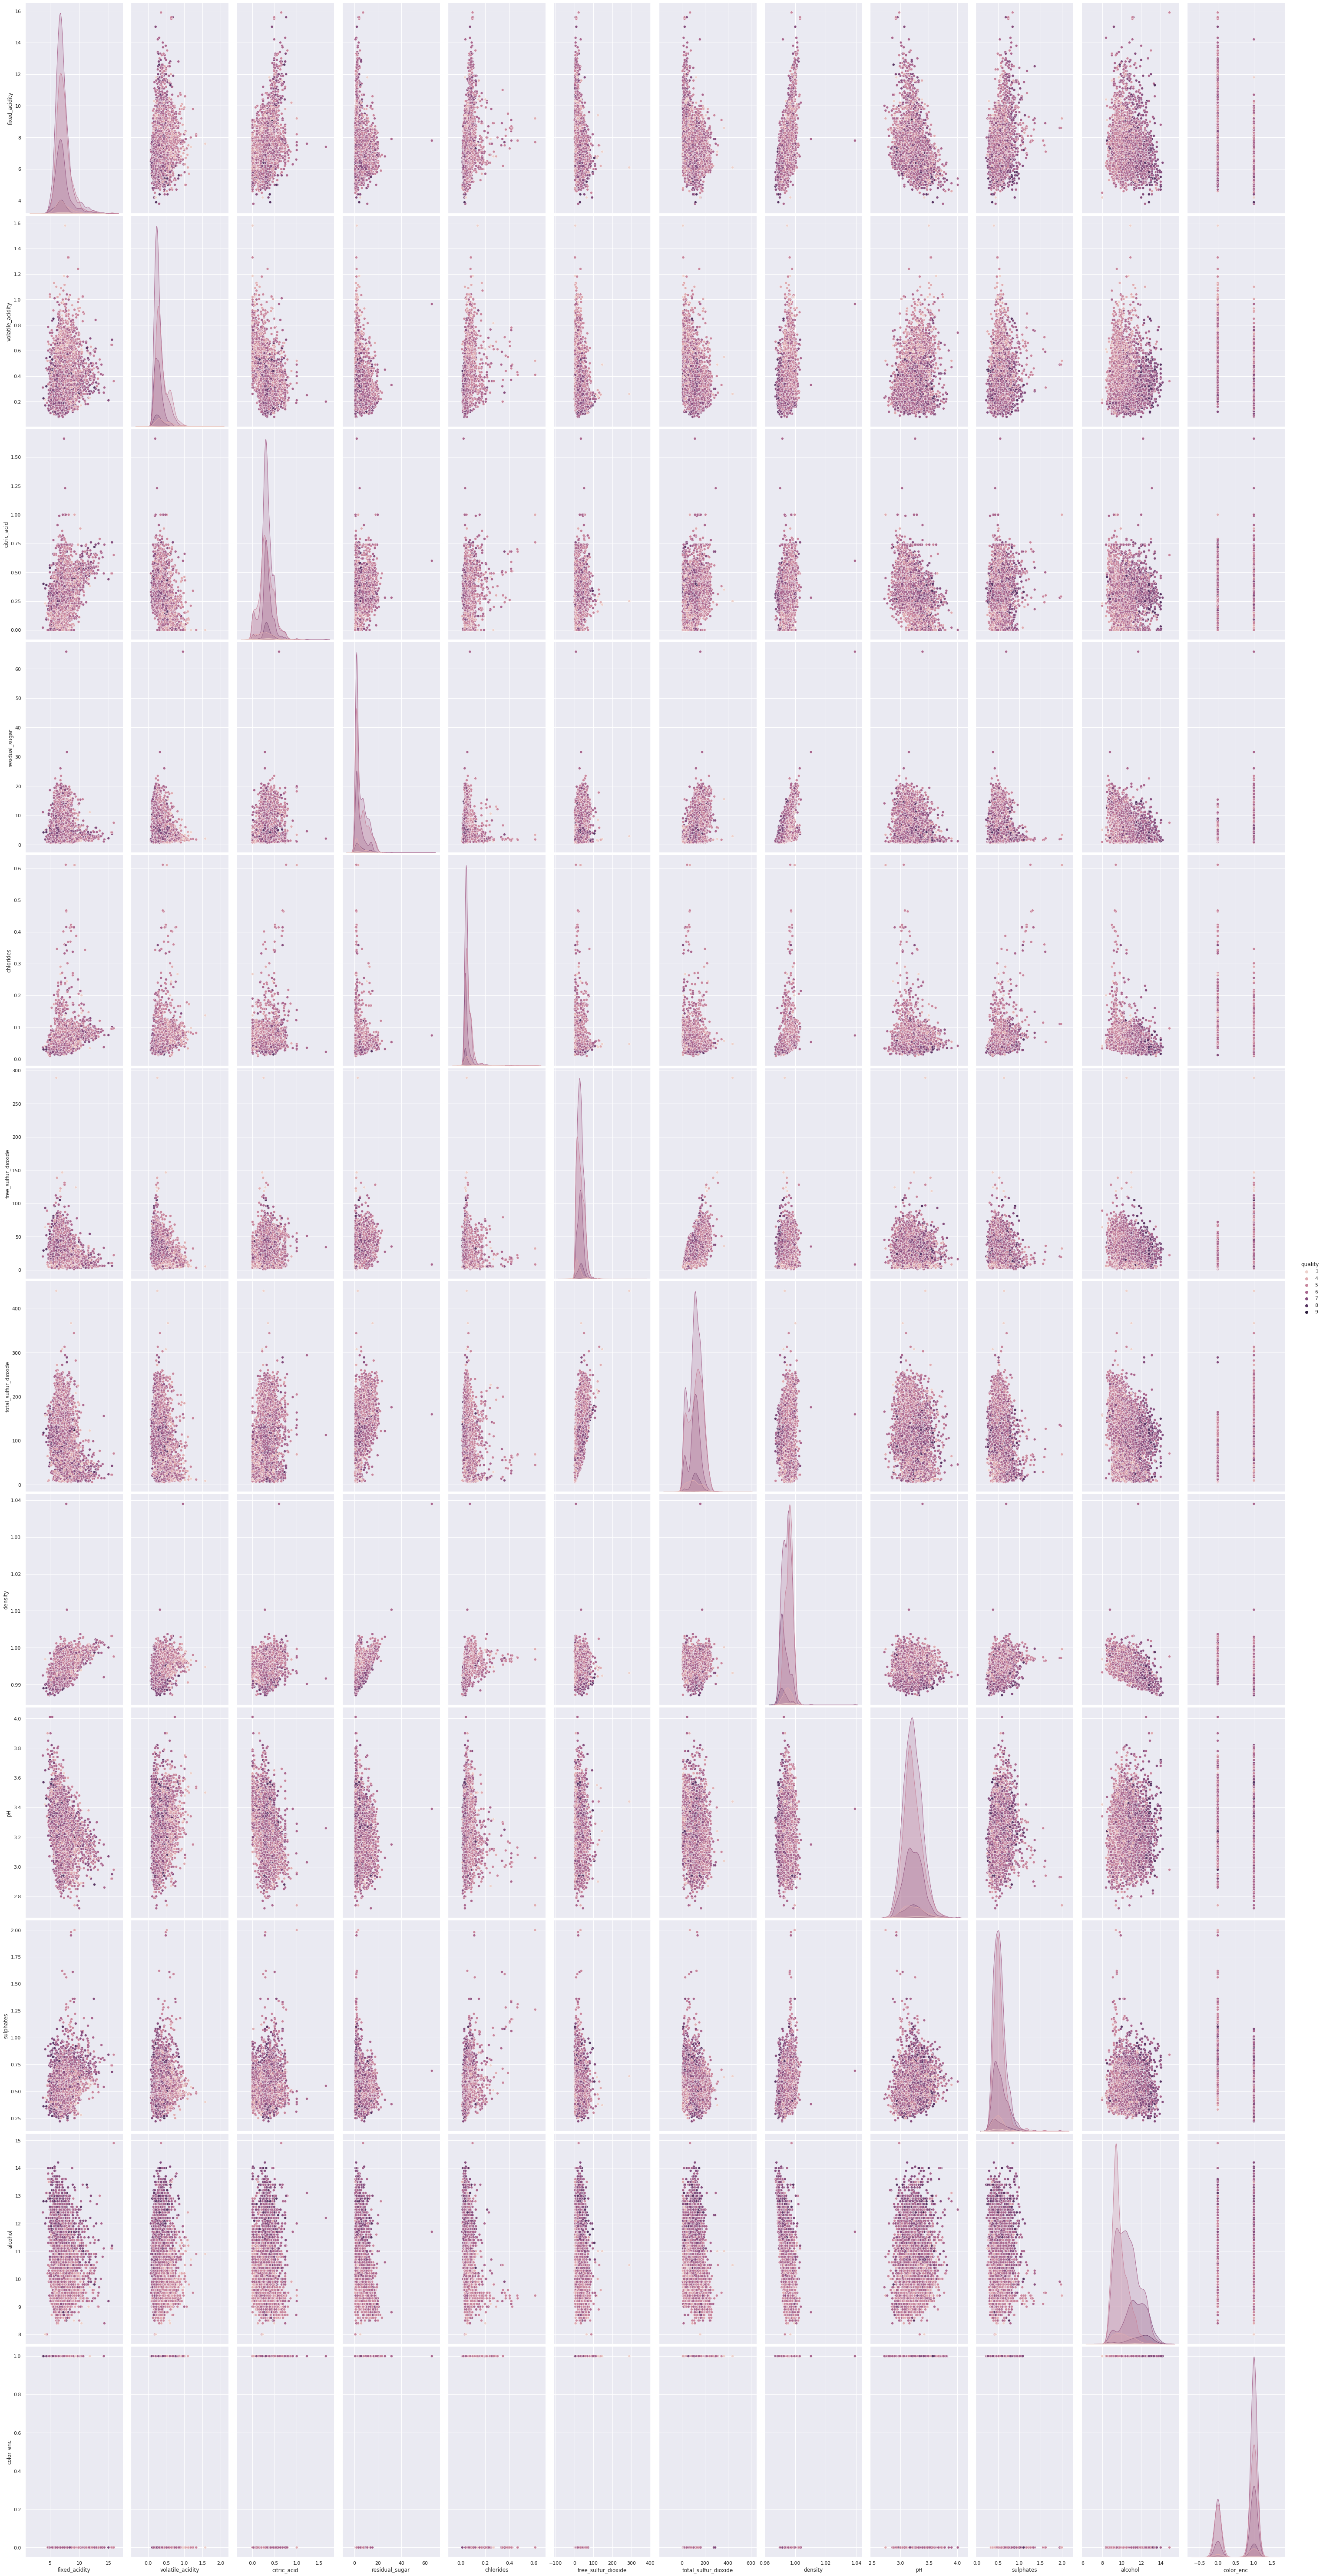

In [ ]:
# pair plot 
#sns.pairplot(df, y_vars=['quality'], kind="hist")
#sns.pairplot(df, diag_kind='kde',hue='quality')
sns.pairplot(df, height=7,aspect=0.5 , diag_kind='kde', hue='quality')

This is a histogram pairplot of quality vs each individual property. The chemical property is on the x-axis, while the quality is on the y-axis. This histogram pairplot shows the count of a particular rank at a particular value of the property. For example for fixed acidity, there are a of quality=6 wines in the range of 5 to 10 for fixed acidity vs, the range of 10 to 15. As the wine quality increases, more the lower range of the fixed acidity has more points than the upper range.

Next, plot a heatmap to visualize features are correlated with each other.

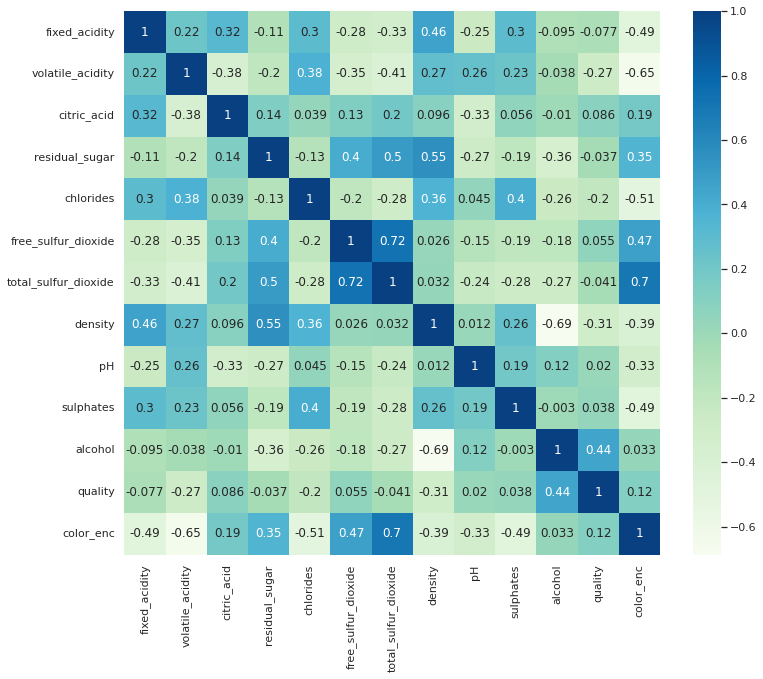

In [ ]:
# Heatmap
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.GnBu)
plt.show()

The Heat map shows the correlation between each of the properties. The highest correlation seems to be between total sulfur dioxide and the color. This could mean that a particular color of wine has more total sulfur dioxide than the other color. 
For determining, which factor affects the quality the most, the highest correlation seems to be between quality and alcohol content.

# Modeling the Data

## Method
For each of type of modeling method:

1. **Evaluate Models** Build a model
1. **Make Predictions or Plot the Accuracy** Make predictions and find accuracy or metrics of the model.
1. **Analyze** Analyze and make conclusion about the fit and accuracy of the model.

In [ ]:
SS=StandardScaler()
X = pd.DataFrame(SS.fit_transform(df), columns=df.columns)
X = df.drop('quality', axis=1)
y = df['quality']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=44)

First we prepared our dataframe. We also scaled our data, so that we do not have any bias later on.

# PCA

Before, we start actually applying models to this data, we will fist use Principal Component Analysis (PCA) on it. PCA is a dimensionality reduction technique. It is very commonly used because it is fast, easy to implement and easy to interpret.

PCA works using smaller sets of “summary indices” that can be visualized and analyzed. This means the data will be more further distributed, without changing the relationship between the data points. This allows us to find patterns or identify clusters.

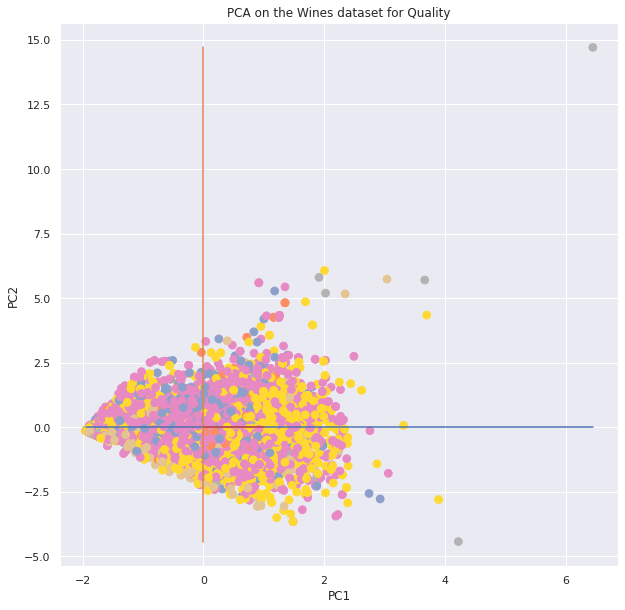

In [ ]:

pca_all = PCA(random_state=101, whiten=True).fit(df)
my_color=y

# Store results of PCA in a data frame
result=pd.DataFrame(pca_all.transform(df), columns=['PCA%i' % i for i in range(df.shape[1])], index=df.index)

# Plot initialisation
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(result['PCA0'], result['PCA1'], c=my_color, cmap="Set2_r", s=60)

# make simple, bare axis lines through space:
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')

# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title("PCA on the Wines dataset for Quality")
plt.show()


We see the graph has multiple colors. These represent the different clusters. We see a lot overlap amongst the different color data points. 

## PCA with K Neighbors Classifier

The K-nearest neighbors (KNN) algorithm is supervised learning classifier. It uses proximity to make classifications or predictions about the grouping of an individual data point working off the assumption that similar points can be found near one another.

We will use KNN with PCA. The accuracy of the model will show how well the model can classify the test data by the response variable "Quality". Using PCA will show us how many components included or excluded will give us the best accuracy by the means of explained variance.

In [ ]:
KNC = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size = 12, n_neighbors = 12, p  = 1, weights = 'distance')
KNC = KNC.fit(X_train, y_train)
print('KNeighbors Classifier Training Accuracy: {:2.2%}'.format(accuracy_score(y_train, KNC.predict(X_train))))
y_pred = KNC.predict(X_test)
print('KNeighbors Classifier Test Accuracy: {:2.2%}'.format(accuracy_score(y_test, y_pred)))

print('_' * 40)
print('\nAccurance on Quality Prediction By Number of PCA COmponents:\n')
AccPca = pd.DataFrame(columns=['Components', 'Var_ratio', 'Train_Acc', 'Test_Acc'])

for componets in np.arange(1, df.shape[1]):
  variance_ratio = sum(pca_all.explained_variance_ratio_[:componets])*100
  pca = PCA(n_components=componets, random_state=101, whiten=True)
  X_train_pca = pca.fit_transform(X_train)
  Components = X_train_pca.shape[1]
  KNC = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size = 12, n_neighbors = 12, p  = 1, weights = 'distance')
  KNC = KNC.fit(X_train_pca, y_train)
  Training_Accuracy = accuracy_score(y_train, KNC.predict(X_train_pca))
  X_test_pca = pca.transform(X_test)
  y_pred = KNC.predict(X_test_pca)
  Test_Accuracy = accuracy_score(y_test, y_pred)
  AccPca = AccPca.append(pd.DataFrame([(Components, variance_ratio, Training_Accuracy, Test_Accuracy)],
                                          columns=['Components', 'Var_ratio', 'Train_Acc', 'Test_Acc']))#], axis=0)

AccPca.set_index('Components', inplace=True)
display(AccPca.sort_values(by='Test_Acc', ascending=False))

KNeighbors Classifier Training Accuracy: 100.00%
KNeighbors Classifier Test Accuracy: 60.92%
________________________________________

Accurance on Quality Prediction By Number of PCA COmponents:



Var_ratio  Train_Acc  Test_Acc
Components                                 
7            99.998323        1.0  0.668923
12          100.000000        1.0  0.664000
11           99.999979        1.0  0.663385
10           99.999715        1.0  0.660923
9            99.999346        1.0  0.654154
8            99.998900        1.0  0.651077
6            99.995803        1.0  0.646769
5            99.982163        1.0  0.630769
4            99.947494        1.0  0.601846
3            99.897424        1.0  0.577846
2            99.414893        1.0  0.566154
1            95.352833        1.0  0.525538

### Explained variance

Explained variance shows how much of the variance/spread of the data is captured in each dimension, i.e. how important each additional principal component is to the original data representation.

It is interesting to see that with 7 components we capture over 99% of the variance.

For this reason, sometimes PCA is used for feature selection. For very big datasets with hundreds of features, it can take a long time to train models with some features not adding much value. A solution is to reduce the number of columns by using principal components from PCA.

## PCA with K Means

We will then use the K Means Method with 7 clusters. k-Means is popular because it is a reliable (always converges) and relatively fast algorithm. The main downside is that you have to decide what the value of k should be beforehand. But using PCA will help decide. 

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'PC2')

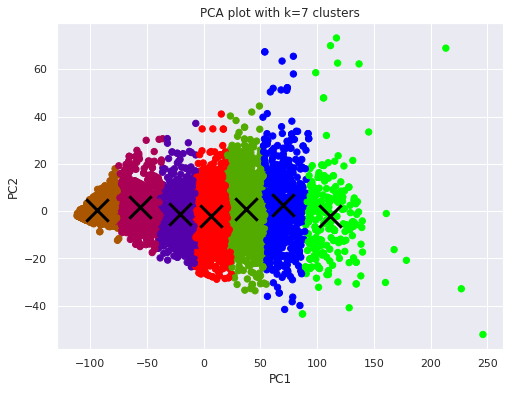

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)
principal_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])


kmeans = KMeans(n_clusters=7, n_init=15, max_iter=500, random_state=0)

# Train and make predictions
clusters = kmeans.fit_predict(X_train)

# Cluster centers
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(principal_df.iloc[:,0], principal_df.iloc[:,1], c=clusters, cmap="brg", s=40)
plt.scatter(x=centroids_pca[:,0], y=centroids_pca[:,1], marker="x", s=500, linewidths=3, color="black")

# Aesthetics
plt.title('PCA plot with k=7 clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

From the model above with K Neighbors Method, we saw that the best number of components for the test data was 7. If we ran a K Means model using k = 7 clusters, the above is what the graph would look like.

# K Means
k-Means is an iterative clustering algorithm that works as follows:

1. Choosing coordinates (e.g. randomly) for the locations of the k centroids.
2. Grouping datapoints together by finding the nearest centroid. (There will always be k groups).
3. Calculating the new center of each centroid by taking the mean position of datapoints in each group.
4. Iterating until the centroids stop moving by a significant amount.


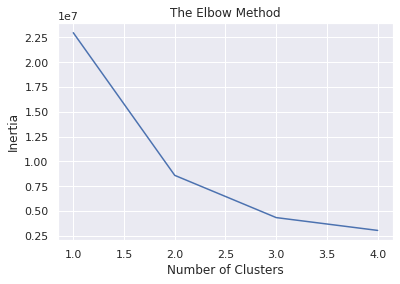

In [ ]:
inertia = []
for i in range(1,5):
    kmeans = KMeans(n_clusters=i,init = 'k-means++',max_iter = 300,n_init = 10,random_state = 0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
plt.plot(range(1,5),inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

### Elbow method
The Elbow Method is one of the most popular methods to determine this optimal value of k. When we see an elbow shape in the graph, we pick the k-value where the elbow gets created. Here we see an elbow shape with an "elbow point" at k = 2 clusters

Lets just look at two components such as the Fixed Acidity vs the Volatile Acidity to determine how they affect the quality of wine. 

In [ ]:
dictionary = {"fixed_acidity":X.fixed_acidity.values,"volatile_acidity":X.volatile_acidity.values}
X2 = pd.DataFrame(dictionary)
X2.head()

fixed_acidity  volatile_acidity
0            7.4              0.70
1            7.8              0.88
2            7.8              0.76
3           11.2              0.28
4            7.4              0.70

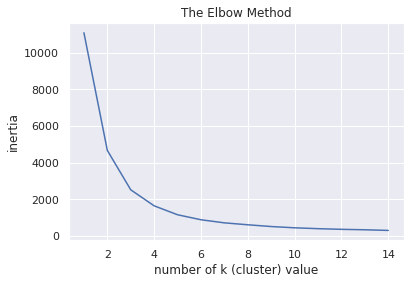

In [ ]:
inertia = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X2)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1,15),inertia)
plt.title('The Elbow Method')
plt.xlabel("number of k (cluster) value")
plt.ylabel("inertia")
plt.show()


We tried to fit that dataframe by using the elbow method and we find it is harder to pinpoint an exact elbow point. This is one of the disadvantages of the elbow method. It looks like k = 3 clusters might work better in this case

In [ ]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X2)
X2["clusters"] = clusters
X2.groupby("clusters").count()

fixed_acidity  volatile_acidity
clusters                                 
0                  3470              3470
1                  2586              2586
2                   441               441

Using the K means method on the dataframe with the two components, shows just the 3 clusters as expected. 

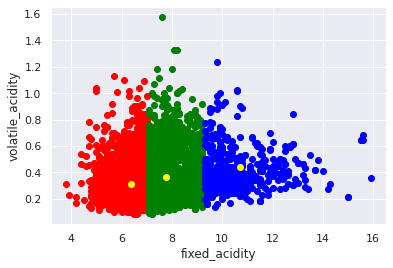

In [ ]:
plt.xlabel("fixed_acidity")
plt.ylabel("volatile_acidity")

plt.scatter(X2.fixed_acidity[X2.clusters == 0 ],X2.volatile_acidity[X2.clusters == 0],color = "red")
plt.scatter(X2.fixed_acidity[X2.clusters == 1 ],X2.volatile_acidity[X2.clusters == 1],color = "green")
plt.scatter(X2.fixed_acidity[X2.clusters == 2 ],X2.volatile_acidity[X2.clusters == 2],color = "blue")

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color = "yellow")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X)
X["clusters"] = clusters
X.groupby("clusters").count()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
clusters                                                                 
0                  2925              2925         2925            2925   
1                  1618              1618         1618            1618   
2                  1954              1954         1954            1954   

          chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  \
clusters                                                                        
0              2925                 2925                  2925     2925  2925   
1              1618                 1618                  1618     1618  1618   
2              1954                 1954                  1954     1954  1954   

          sulphates  alcohol  color_enc  
clusters                                 
0              2925     2925       2925  
1              1618     1618       1618  
2              1954     1954       1954

We were able to see the difference between clustering with k = 3 and k = 7 above. 

# Hierarchical Clustering

Hierarchical clustering is an algorithm that groups similar objects into clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

We will perform Agglomerative Clustering modeling on this data. Agglomerative Clustering is used to group objects based on their similarity. The algorithm starts by treating each object as an individual cluster. Next, it merges pairs of clusters are until all clusters have been merged into one big cluster containing all objects. 

In [ ]:
model = AgglomerativeClustering(n_clusters=6, affinity='euclidean',  linkage='average')
model.fit(X)
X['labels'] = model.labels_
X.groupby(["labels"]).count()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
labels                                                                 
0                4428              4428         4428            4428   
1                1721              1721         1721            1721   
2                 342               342          342             342   
3                   1                 1            1               1   
4                   2                 2            2               2   
5                   3                 3            3               3   

        chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  \
labels                                                                        
0            4428                 4428                  4428     4428  4428   
1            1721                 1721                  1721     1721  1721   
2             342                  342                   342      342   342   
3               1                    1                     1        1     1   
4               2                    2                     2        2     2   
5               3                    3                     3        3     3   

        sulphates  alcohol  color_enc  clusters  
labels                                           
0            4428     4428       4428      4428  
1            1721     1721       1721      1721  
2             342      342        342       342  
3               1        1          1         1  
4               2        2          2         2  
5               3        3          3         3

In [ ]:
wine_clusters = X.groupby(['labels'])
wine_groups = wine_clusters.head()

Lets see how our predictions line up with our true labels.

In [ ]:
Z_avg = linkage(X, 'average')
c_avg, coph_dists = cophenet(Z_avg , pdist(X))
print(c)

Z_comp = linkage(X, 'complete')
c_comp, coph_dists = cophenet(Z_comp , pdist(X))
print(c_comp)

Z_ward = linkage(X, 'ward')
c_ward, coph_dists = cophenet(Z_ward , pdist(X))
print(c_ward)

Z_sing = linkage(X, 'single')
c_sing, coph_dists = cophenet(Z_sing , pdist(X))
print(c_sing)

color_enc
0.6371714410394942
0.6953595888108773
0.26151132477072914


Accuracy for the each variation of the model where the linkage was varied, shows that the variation with linkage = average is the best. 

### Dendograms

Dendograms are a tree-based representation of the objects. These are formed by linking similar objects with each iteration. 

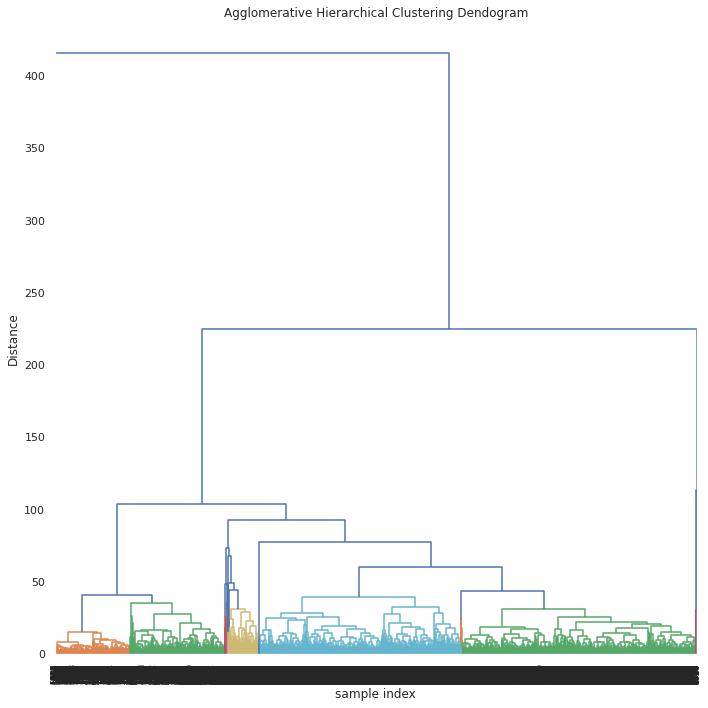

In [ ]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z_avg, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

### Hierarchichal Modeling Data with two features.

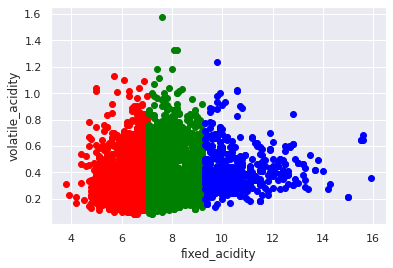

In [ ]:
model_2 = AgglomerativeClustering(n_clusters = 5,affinity= "euclidean",linkage = "ward")
cluster = model_2.fit_predict(X2)
X2["label"] = cluster


plt.xlabel("fixed_acidity")
plt.ylabel("volatile_acidity")

plt.scatter(X2.fixed_acidity[X2.clusters == 0 ],X2.volatile_acidity[X2.clusters == 0],color = "red")
plt.scatter(X2.fixed_acidity[X2.clusters == 1 ],X2.volatile_acidity[X2.clusters == 1],color = "green")
plt.scatter(X2.fixed_acidity[X2.clusters == 2 ],X2.volatile_acidity[X2.clusters == 2],color = "blue")
plt.show()

# Conclusion

So, in conclusion, we saw a definite improvement in our accuacy score for KNN model (supervised learning) of 60% vs. the agglomerative heirarchical clustering model (unsupervised learning) of 72%. While the accuracy is not very good, it is better than the supervised learning model. 

By changing the hyperparamters we do see improvement but we are running into the issue of overfitting our data where, our data fits well on the training but does not perform well on the test data. 

Our result do get better when we choose lesser number of features but then we lose a lot of information regarding the quality of the wine and we risk underfitting the data, where we will be less flexible and cannot account for some of the data.

After our analysis, it is fair to say that unsupervised learning is not the best method to use with this data set. 

Generally speaking, unsupervised learning technique is used where a model must look for patterns in a dataset with no labels and with minimal human supervision. In unsupervised learning, only the inputs are available, and a model must look for interesting patterns in the data.

This is in contrast to supervised learning techniques, such as classification or regression, where a model is given a training set of inputs and a set of observations, learns from that. 

With our Wine Dataset, a large number of features work together to influence the quality of the wine. Therefore all the clusters sit on top of each other. So it is hard to draw any inferences or find any kind of patters in the cluster.  

While this dataset gave us some very interesting visualizations and there was some improvement in the accuracy score, it is still better suited for supervised machine learning techniques such as classifiation. 

